# Trabajo Practico 1

In [1]:
# encoding=utf8

# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Carga de datos, indicando el tipo de dato se redujo de 71.3 Mb a 13.2 Mb
data_values = pd.read_csv('train_values.csv',dtype = {
    "geo_level_1_id" : "int16", 
    "geo_level_2_id" : "int16",
    "geo_level_3_id" : "int16",
    "count_floors_pre_eq" : "int8",
    "age" : "int16",
    "area_percentage" :"int16",
    "height_percentage" :"int16",
    "land_surface_condition" :"category",
    "foundation_type" :"category",
    "roof_type" :"category",
    "ground_floor_type" :"category",
    "other_floor_type" :"category",
    "position" :"category",
    "plan_configuration" :"category",
    "has_superstructure_adobe_mud" : "bool",
    "has_superstructure_mud_mortar_stone" : "bool",
    "has_superstructure_stone_flag" : "bool",
    "has_superstructure_cement_mortar_stone" : "bool",
    "has_superstructure_mud_mortar_brick" : "bool",
    "has_superstructure_cement_mortar_brick" : "bool",
    "has_superstructure_timber" : "bool",
    "has_superstructure_bamboo" : "bool",
    "has_superstructure_rc_non_engineered" : "bool",
    "has_superstructure_rc_engineered" : "bool",
    "has_superstructure_other" : "bool",
    "legal_ownership_status" :"category",
    "count_families" : "int16",
    "has_secondary_use" : "bool",
    "has_secondary_use_agriculture" : "bool",
    "has_secondary_use_hotel" : "bool",
    "has_secondary_use_rental" : "bool",
    "has_secondary_use_institution" : "bool",
    "has_secondary_use_school" : "bool",
    "has_secondary_use_industry" : "bool",
    "has_secondary_use_health_post" : "bool",
    "has_secondary_use_gov_office" : "bool",
    "has_secondary_use_use_police" : "bool",
    "has_secondary_use_other" : "bool"
                    
})

data_labels = pd.read_csv('train_labels.csv',dtype = {
    "damage_grade" : "category"    
})

In [3]:
data_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int64   
 1   geo_level_1_id                          260601 non-null  int16   
 2   geo_level_2_id                          260601 non-null  int16   
 3   geo_level_3_id                          260601 non-null  int16   
 4   count_floors_pre_eq                     260601 non-null  int8    
 5   age                                     260601 non-null  int16   
 6   area_percentage                         260601 non-null  int16   
 7   height_percentage                       260601 non-null  int16   
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                       

In [4]:
data_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   building_id   260601 non-null  int64   
 1   damage_grade  260601 non-null  category
dtypes: category(1), int64(1)
memory usage: 2.2 MB


In [5]:
data_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


## Calculo porcentaje de tipo de daño de los edifcios

In [6]:
cantidad_edificios = data_labels["building_id"].count()
cantidad_edificios

260601

In [12]:
damage = data_labels.groupby(["damage_grade"]).count()
damage

,building_id
damage_grade,
1,25124
2,148259
3,87218


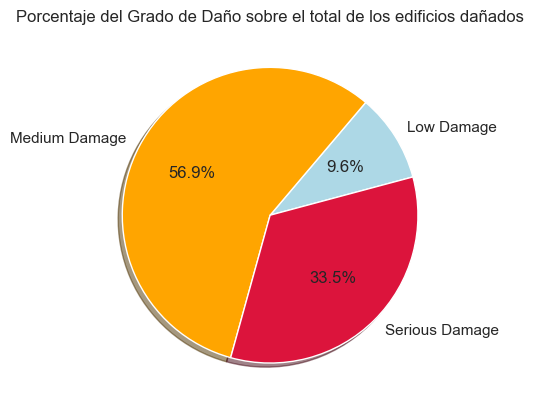

In [46]:
#Definir colores
my_colors = my_colors = ['lightblue','orange','crimson']

plt.pie(damage["building_id"].to_list(),
        labels = ["Low Damage" ,"Medium Damage","Serious Damage"],
        autopct='%1.1f%%',
        startangle=15,           
        shadow = True,
        colors = my_colors
)
plt.title("Porcentaje del Grado de Daño sobre el total de los edificios dañados")
plt.show()

## Mis columnas a estudiar

In [64]:
# Ahora analizo los edificios mas dañados
seriousDamageBuildings = data_labels[data_labels["damage_grade"] == "3"]
seriousDamageBuildings

,building_id,damage_grade
0,802906,3
2,94947,3
4,201944,3
6,728451,3
10,7962,3
...,...,...
260591,560805,3
260595,827012,3
260597,669485,3
260598,602512,3


In [65]:
data_labels

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
...,...,...
260596,688636,2
260597,669485,3
260598,602512,3
260599,151409,2


In [71]:
# Me quedo solo con los datos que me toca analizar
data_values_short = data_values.loc[:,["building_id",
                                       "geo_level_1_id",
                                       "geo_level_2_id",
                                       "geo_level_3_id",
                                       "count_floors_pre_eq",
                                       "age",
                                       "area_percentage",
                                       "height_percentage"
                                      ]]
data_values_short

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage
0,802906,6,487,12198,2,30,6,5
1,28830,8,900,2812,2,10,8,7
2,94947,21,363,8973,2,10,5,5
3,590882,22,418,10694,2,10,6,5
4,201944,11,131,1488,3,30,8,9
...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3
260597,669485,17,715,2060,2,0,6,5
260598,602512,17,51,8163,3,55,6,7
260599,151409,26,39,1851,2,10,14,6


In [72]:
# Unifico data frames
data_values_short["damage_grade"] = data_labels["damage_grade"]
data_values_short

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,damage_grade
0,802906,6,487,12198,2,30,6,5,3
1,28830,8,900,2812,2,10,8,7,2
2,94947,21,363,8973,2,10,5,5,3
3,590882,22,418,10694,2,10,6,5,2
4,201944,11,131,1488,3,30,8,9,3
...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,2
260597,669485,17,715,2060,2,0,6,5,3
260598,602512,17,51,8163,3,55,6,7,3
260599,151409,26,39,1851,2,10,14,6,2


## Por Edades

In [73]:
#Analizo porcentaje de daño por edad
data_values_short["cantidad"]=1
daño_por_edad = data_values_short.groupby(["age","damage_grade"]).agg({"cantidad" : "count"})
daño_por_edad

cantidad
age damage_grade          
0   1                 7213
    2                12721
    3                 6107
5   1                 5590
    2                19030
...                    ...
200 2                   64
    3                   39
995 1                  179
    2                  822
    3                  389

[126 rows x 1 columns]

## Por ubicacion geografica

In [81]:
#Analizo porcentaje de daño por ubicacion
daño_por_ubicacion = data_values_short.groupby(["geo_level_1_id","damage_grade"]).agg({"cantidad" : "count"})
daño_por_ubicacion

cantidad
geo_level_1_id damage_grade          
0              1                  337
               2                 3075
               3                  599
1              1                  411
               2                 1985
...                               ...
29             2                  349
               3                   39
30             1                  252
               2                 2127
               3                  307

[93 rows x 1 columns]

## Por cantidad de pisos

In [111]:
#Analizo porcentaje de daños por cantidad de pisos
daño_por_pisos = data_values_short.groupby(["count_floors_pre_eq","damage_grade"]).agg({"cantidad" : "count"})
daño_por_pisos.reset_index(inplace = True)


,count_floors_pre_eq,damage_grade,cantidad
1,1,2,20798
4,2,2,93968
7,3,2,28479
10,4,2,3374
13,5,2,1481
16,6,2,133
19,7,2,25
22,8,2,1
25,9,2,0


In [128]:
list(daño_por_pisos[daño_por_pisos["damage_grade"]=="1"]["cantidad"])

[8969, 12593, 2537, 707, 254, 53, 10, 0, 1]

In [124]:
list(daño_por_pisos[daño_por_pisos["damage_grade"]=="2"])

['count_floors_pre_eq', 'damage_grade', 'cantidad']

In [125]:
list(daño_por_pisos[daño_por_pisos["damage_grade"]=="3"])

['count_floors_pre_eq', 'damage_grade', 'cantidad']

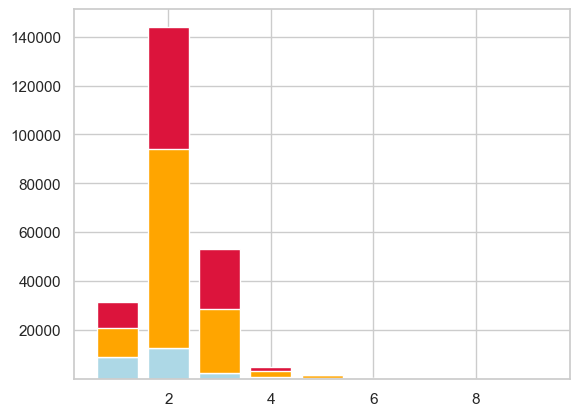

In [138]:
my_colors = my_colors = ['lightblue','orange','crimson']
labels = list(range(1,10))

low =list(daño_por_pisos[daño_por_pisos["damage_grade"]=="1"]["cantidad"])
medium=list(daño_por_pisos[daño_por_pisos["damage_grade"]=="2"]["cantidad"])
high = list(daño_por_pisos[daño_por_pisos["damage_grade"]=="3"]["cantidad"])

plt.bar(labels, low, color='lightblue',label = 'Low Damage')
plt.bar(labels, medium, bottom=low, color='orange',label = 'Medium Damage')
plt.bar(labels, high, bottom=medium, color='crimson',label = 'High Damage')
plt.show()


## Por altura del edificio

In [82]:
#Analizo porcentaje de daño por altura
daño_por_altura = data_values_short.groupby(["height_percentage","damage_grade"]).agg({"cantidad" : "count"})
daño_por_altura

cantidad
height_percentage damage_grade          
2                 1                 1502
                  2                 4841
                  3                 2962
3                 1                 6122
                  2                13636
...                                  ...
31                2                    1
                  3                    0
32                1                    0
                  2                    1
                  3                   74

[81 rows x 1 columns]

## Por area del edificio 

In [83]:
#Analizo porcentaje de daño por area
daño_por_area = data_values_short.groupby(["area_percentage","damage_grade"]).agg({"cantidad" : "count"})
daño_por_area

cantidad
area_percentage damage_grade          
1               1                   12
                2                   49
                3                   29
2               1                  408
                2                 1683
...                                ...
96              2                    1
                3                    1
100             1                    0
                2                    1
                3                    0

[252 rows x 1 columns]